In [25]:
import numpy as np
import matplotlib.pyplot as plt

#Defining constant model parameters
Cm = 1.0  #uF/cm^2
gK = 36.0 #uF/cm^2
VK = -12.0 #mV
gl = 0.3  #uF/cm^2
Vl = 10.6  #mV
gNa = 120.0 #uF/cm^2
VNa = 120.0 #mV

#Defining rate equations for pottasium channel
def alpha_n(V):
    return (0.01*(10.0 - V))/(np.exp(1.0-(0.1*V)) - 1.0)
def beta_n(V):
    return 0.125 * np.exp(-V/80.0)

#Defining rate equation for sodium channels
def alpha_m(V):
    return 0.1 * (25-V) / (np.exp((25-V)/10)-1)
def beta_m(V):
    return 4 * np.exp(-V/18)
def alpha_h(V):
    return 0.07 * np.exp(-V/20)
def beta_h(V):
    return 1 / (np.exp((30-V)/10)+1)

#Gillespie Algorithm
def condition(V,Kin,Nain,t,dt):    
    tau = t
    Ks = Kin #Potassium state
    Nas = Nain #Sodium state

    while(tau<(t+dt)):
        r = np.zeros((28))
        r[0] = 3*alpha_m(V)*Nas[0,0]
        r[1] = r[0] + 2*alpha_m(V)*Nas[1,0]
        r[2] = r[1] + 1*alpha_m(V)*Nas[2,0]
        r[3] = r[2] + 3*beta_m(V)*Nas[3,0]
        r[4] = r[3] + 2*beta_m(V)*Nas[2,0]
        r[5] = r[4] + 1*beta_m(V)*Nas[1,0]
        r[6] = r[5] + 1*alpha_h(V)*Nas[0,0]
        r[7] = r[6] + 1*alpha_h(V)*Nas[1,0]
        r[8] = r[7] + 1*alpha_h(V)*Nas[2,0]
        r[9] = r[8] + 1*alpha_h(V)*Nas[3,0]
        r[10] = r[9] + 1*beta_h(V)*Nas[0,1]
        r[11] = r[10] + 1*beta_h(V)*Nas[1,1]
        r[12] = r[11] + 1*beta_h(V)*Nas[2,1]
        r[13] = r[12] + 1*beta_h(V)*Nas[3,1]
        r[14] = r[13] + 3*alpha_m(V)*Nas[0,1]
        r[15] = r[14] + 2*alpha_m(V)*Nas[1,1]
        r[16] = r[15] + 1*alpha_m(V)*Nas[2,1]
        r[17] = r[16] + 3*beta_m(V)*Nas[3,1]
        r[18] = r[17] + 2*beta_m(V)*Nas[2,1]
        r[19] = r[18] + 1*beta_m(V)*Nas[1,1]
        r[20] = r[19] + 4*alpha_n(V)*Ks[0]
        r[21] = r[20] + 3*alpha_n(V)*Ks[1]
        r[22] = r[21] + 2*alpha_n(V)*Ks[2]
        r[23] = r[22] + 1*alpha_n(V)*Ks[3]
        r[24] = r[23] + 4*beta_n(V)*Ks[4]
        r[25] = r[24] + 3*beta_n(V)*Ks[3]
        r[26] = r[25] + 2*beta_n(V)*Ks[2]
        r[27] = r[26] + 1*beta_n(V)*Ks[1]
        
        R = r[28] #Total rate
        dt = -np.log(np.random.uniform(0,1))/R #time step
        tau +=dt #updating time
        
        while(tau<(t+dt)):
            r = np.random.randn()*R #selecting a random number
            if(r<r[0]):
                Nas[0,0] -= 1
                Nas[1,0] += 1
            elif(r<r[1]):
                Nas[1,0] -= 1
                Nas[2,0] += 1
            elif(r<r[2]):
                Nas[2,0] -= 1
                Nas[3,0] += 1
            elif(r<r[3]):
                Nas[3,0] -= 1
                Nas[2,0] += 1
            elif(r<r[4]):
                Nas[2,0] -= 1
                Nas[1,0] += 1
            elif(r<r[5]):
                Nas[1,0] -= 1
                Nas[0,0] += 1
            elif(r<r[6]):
                Nas[0,0] -= 1
                Nas[0,1] += 1
            elif(r<r[7]):
                Nas[1,0] -= 1
                Nas[1,1] += 1
            elif(r<r[8]):
                Nas[2,0] -= 1
                Nas[2,1] += 1
            elif(r<r[9]):
                Nas[3,0] -= 1
                Nas[3,1] += 1
            elif(r<r[10]):
                Nas[0,1] -= 1
                Nas[0,0] += 1
            elif(r<r[11]):
                Nas[1,1] -= 1
                Nas[1,0] += 1
            elif(r<r[12]):
                Nas[2,1] -= 1
                Nas[2,0] += 1
            elif(r<r[13]):
                Nas[3,1] -= 1
                Nas[3,0] += 1
            elif(r<r[14]):
                Nas[0,1] -= 1
                Nas[1,1] += 1
            elif(r<r[15]):
                Nas[1,1] -= 1
                Nas[2,1] += 1
            elif(r<r[16]):
                Nas[2,1] -= 1
                Nas[3,1] += 1
            elif(r<r[17]):
                Nas[3,1] -= 1
                Nas[2,1] += 1
            elif(r<r[18]):
                Nas[2,1] -= 1
                Nas[1,1] += 1
            elif(r<r[19]):
                Nas[1,1] -= 1
                Nas[0,1] += 1
            elif(r<r[20]):
                Ks[0] -= 1
                Ks[1] += 1
            elif(r<r[21]):
                Ks[1] -= 1
                Ks[2] += 1
            elif(r<r[22]):
                Ks[2] -= 1
                Ks[3] += 1
            elif(r<r[23]):
                Ks[3] -= 1
                Ks[4] += 1
            elif(r<r[24]):
                Ks[4] -= 1
                Ks[3] += 1
            elif(r<r[25]):
                Ks[3] -= 1
                Ks[2] += 1
            elif(r<r[26]):
                Ks[2] -= 1
                Ks[1] += 1
            elif(r<r[27]):
                Ks[1] -= 1
                Ks[0] += 1
        Ko = Ks
        Nao = Nas
    return Ko,Nao

class Model(object):
    def __init__(self):
        ta = np.arange(0.0,100.01,0.01) #time array
        Cin = np.zeros(len(ta)) #input current
        for i,t in enumerate(ta):
            if(5<=t<=15):
                Cin[i] = 10.0
        s = 'ODE' #model
        
        self.ta = ta
        self.Cin = Cin
        self.s = s
        
    def __call__(self):
        self.Final_model()
        self.plot()
        self.fraction_plot()
        self.subunit_plot()

    def Final_model(self):
        t = self.ta
        Cin = self.Cin
        s = self.s
        
        dt = t[1] - t[0] #step size
        nt = len(t) #iterate over
        nt1 = nt - 1 #at which step to solve

        v_array = np.zeros((nt)) #Voltage array
        n_array = np.zeros((nt)) #n subunit array
        m_array = np.zeros((nt)) #m subunit array
        h_array = np.zeros((nt)) #h subunit array
        frac_K = np.zeros((nt)) #Potassium fraction array
        frac_Na = np.zeros((nt)) #Sodium fraction array

        t0 = t[0]
        V = v_array[0]
        n = alpha_n(V)/(alpha_n(V) + beta_n(V))
        m = alpha_m(V)/(alpha_m(V) + beta_m(V))
        h = alpha_h(V)/(alpha_h(V) + beta_h(V))
        K_frac = np.power(n,4)
        Na_frac = np.power(m,3)*h
        NK = 150 #Number of Potassium channels
        NNa = 150 #Number of Sodium channels

        noise_n = lambda V,n: np.sqrt((alpha_n(V)*(1-n) + beta_n(V)*n)/NK)*np.random.randn()
        noise_m = lambda V,m: np.sqrt((alpha_m(V)*(1-m) + beta_m(V)*m)/NNa)*np.random.randn()
        noise_h = lambda V,h: np.sqrt((alpha_h(V)*(1-h) + beta_h(V)*h)/NNa)*np.random.randn()
        
        #Markov Chain
        if(s=="MC"):
            Na_mc = np.zeros((4,2))
            Na_mc[0,0] = np.floor(NNa*(1-m)**3*(1-h))
            Na_mc[1,0] = np.floor(NNa*3*m*(1-m)**2*(1-h))
            Na_mc[2,0] = np.floor(NNa*3*m**2*(1-m)*(1-h))
            Na_mc[3,0] = np.floor(NNa*m**3*(1-h))
            Na_mc[0,1] = np.floor(NNa*(1-m)**3*h)
            Na_mc[1,1] = np.floor(NNa*3*m*(1-m)**2*h)
            Na_mc[2,1] = np.floor(NNa*3*m**2*(1-m)*h)
            Na_mc[3,1] = NNa - sum(sum(Na_mc))
            
            K_mc = np.zeros(5)
            K_mc[0] = np.floor(NK*(1-n)**4)
            K_mc[1] = np.floor(NK*4*n*(1-n)**3)
            K_mc[2] = np.floor(NK*6*n**2*(1-n)**2)
            K_mc[3] = np.floor(NK*4*n**3*(1-n))
            K_mc[4] = NK-sum(K_mc)
            
        for i in range(1,nt):
            I = Cin[i-1]
            n += dt*(alpha_n(V)*(1-n) - beta_n(V)*n) + noise_n(V,n)*np.sqrt(dt) 
            m += dt*(alpha_m(V)*(1-m) - beta_m(V)*m) + noise_m(V,m)*np.sqrt(dt)
            h += dt*(alpha_h(V)*(1-h) - beta_h(V)*h) + noise_h(V,h)*np.sqrt(dt)
            
            if(s=='MC'):
                Na_mc,K_mc = condition(V,Na_mc,K_mc,t0,dt)
                K_frac = K_mc[4]/NK
                Na_frac = Na_mc[3,1]/NNa
            else:
                K_frac = max(0,min(np.append(n**4,1)))
                Na_frac = max(0,min(np.append(m**3*h,1)))

            V_ = (I/Cm) - ((gNa*(V-VNa)*(Na_frac))/Cm) - ((gK*(V-VK)*(K_frac))/Cm) - (gl*(V-Vl))/Cm
            V += dt*V_ + np.sqrt(dt)/Cm #Updating Voltage
            v_array[i] = V
            n_array[i] = n
            m_array[i] = m
            h_array[i] = h
            frac_K[i] = K_frac
            frac_Na[i] = Na_frac

        self.v_array = v_array
        self.n_array = n_array
        self.m_array = m_array
        self.h_array = h_array
        self.frac_K = frac_K
        self.frac_Na = frac_Na
    
    def plot(self):
        t = self.ta
        V = self.v_array
        plt.plot(t,V)
        plt.xlabel("Time(ms)")
        plt.ylabel("Voltage(mV)")
        plt.title("Neural Spike(200 channels)")
        plt.show()
    
    def fraction_plot(self):
        t = self.ta
        frac_K = self.frac_K
        frac_Na = self.frac_Na
        plt.plot(t,frac_K,'b',label="Fraction of K channels")
        plt.plot(t,frac_Na,'k',label="Fraction of Sodium channels")
        plt.xlabel("Time(ms)")
        plt.ylabel("Fractions")
        plt.title("Fraction of Subunits(200 channels)")
        plt.legend()
        plt.show()
    
    def subunit_plot(self):
        t = self.ta
        n_array = self.n_array
        m_array = self.m_array
        h_array = self.h_array
        plt.plot(t,n_array,'b',label="n subunit")
        plt.plot(t,m_array,'y',label="m sububit")
        plt.plot(t,h_array,'k',label="h subunit")
        plt.xlabel("Time(ms)")
        plt.ylabel("Subunits")
        plt.title("Channel Subunits(200 channels)")
        plt.legend()
        plt.show()

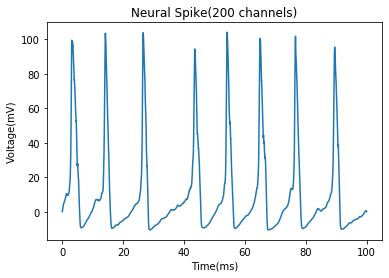

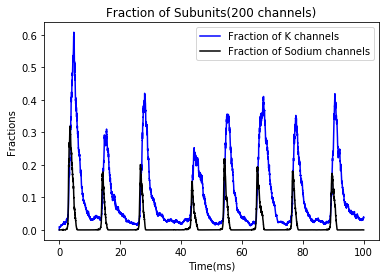

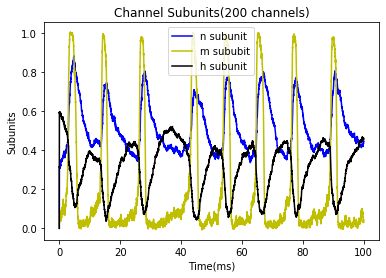

In [26]:
n = Model()
n()